![iKickstarter image](https://i.ya-webdesign.com/images/kickstarter-logo-png-6.png)

#### Introduction
Kickstarter is a global crowd-funding platform that started in 2009, focused mainly on art and creative projects. Kickstarter has received more than $4.6 billion in pledges from 17.2 million backers (people funding the projects) to fund 445,000 projects, such as films, music, stage shows, comics, journalism, video games, technology, publishing, and food-related projects. People who back Kickstarter projects are offered tangible rewards or experiences in exchange for their pledges. 

The data consists of 378,663 rows and 15 columns of features describing the various aspects of the Kickstarter projects. 

#### Motivation and Audience:
- Kickstarter projects is a cool intiative to promote and encourage art, entrepreneurship and creativity. 
- This project analysis will help backer(people funding the projects) to have a good idea about the stats behind the success of kickstarter. They will be able to judge the kind of projects that will make profit and be a success and those that will fail. 
- This analysis will also help kickstarter in knowing which category of projects need an extra push for advertising and backing. 
- Entrepreneurs will benefit from this analysis too, as they will know how much funding to expect, what amount goals and duration to set.

### Import libraries

In [1]:
# All the necessary imports

import matplotlib.pyplot as plt   # Will be useful for exploring the data.
%matplotlib inline
import numpy as np     # All the essential functions used for descriptive statistics.
import pandas as pd    # All the necessary dataframe operations.
import seaborn as sns  
import sklearn         # Used for predictive modeling

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score,classification_report    #metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler   # standardize features by removing mean and scaling to unit variables

import time
from datetime import datetime


#### Read Data

In [2]:
# Using pandas package to read data
data=pd.read_csv('ks-projects-201801.csv')

In [3]:
# (Rows, Columns)

print("The data has ",data.shape[0],"rows and",data.shape[1],"columns")

The data has  378661 rows and 15 columns


In [4]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
# The data types of the columns in the dataset.

data.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [6]:
# Check for nulls and missing data in columns.

data.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
data.drop(['usd pledged'], axis = 1, inplace = True)    #We will use usd_pledged_real, so we can drop the usd pledged column
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [8]:
data[pd.isnull(data['name'])].index     #These are real projects, so we will keep it

Int64Index([166851, 307234, 309991, 338931], dtype='int64')

### Data Manipulation

In [9]:
# A new column where the pledge ratio is calculated.

data['pledged_ratio'] = data['usd_pledged_real']/ data['usd_goal_real']

In [10]:
# Converting the 'launched' column to date format.

data['launched']= pd.to_datetime(data['launched'])

In [11]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,0.080700
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,0.004889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,0.000200
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,0.065795


In [12]:
# Making 2 new columns which specify the year and the date and are extracted from the launched column itself.

data['year'] = pd.DatetimeIndex(data['launched']).year
data['month'] = pd.DatetimeIndex(data['launched']).month

In [13]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd_pledged_real', 'usd_goal_real', 'pledged_ratio', 'year', 'month'],
      dtype='object')

In [14]:
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio,year,month
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,0.000000,2015,8
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,0.080700,2017,9
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,0.004889,2013,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,0.000200,2012,3
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00,0.065795,2015,7


### Exploratory Data Analysis

In [15]:
# How many observations belong to different years listed in the data.

data.year.value_counts(normalize=True) * 100

2015    20.414038
2014    17.890673
2016    15.101634
2017    13.785418
2013    11.844631
2012    10.871201
2011     6.928889
2010     2.777947
2009     0.350974
2018     0.032747
1970     0.001849
Name: year, dtype: float64

In [16]:
# Removing the year 1970 from the data.

data=data[data.year != 1970]

In [42]:
data.year.value_counts(normalize=True) * 100

2015    20.414415
2014    17.891003
2016    15.101914
2017    13.785672
2013    11.844850
2012    10.871402
2011     6.929017
2010     2.777998
2009     0.350980
2018     0.032748
Name: year, dtype: float64

In [17]:
data.year.unique()

array([2015, 2017, 2013, 2012, 2016, 2014, 2010, 2011, 2009, 2018])

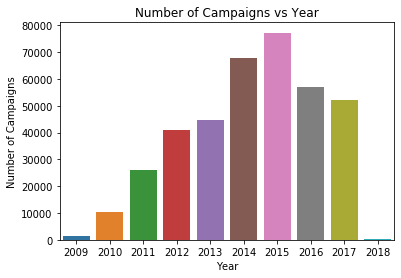

In [18]:
# Plot to determine the number of projects each year.

ax = sns.countplot(data.year)
plt.xlabel("Year")
plt.ylabel("Number of Campaigns")
plt.title("Number of Campaigns vs Year")
plt.show(ax)

In [19]:
# Normalizing the counts of observations belonging to different state.

data['state'].value_counts(normalize=True) * 100

failed        52.216271
successful    35.376888
canceled      10.239691
undefined      0.940700
live           0.739197
suspended      0.487252
Name: state, dtype: float64

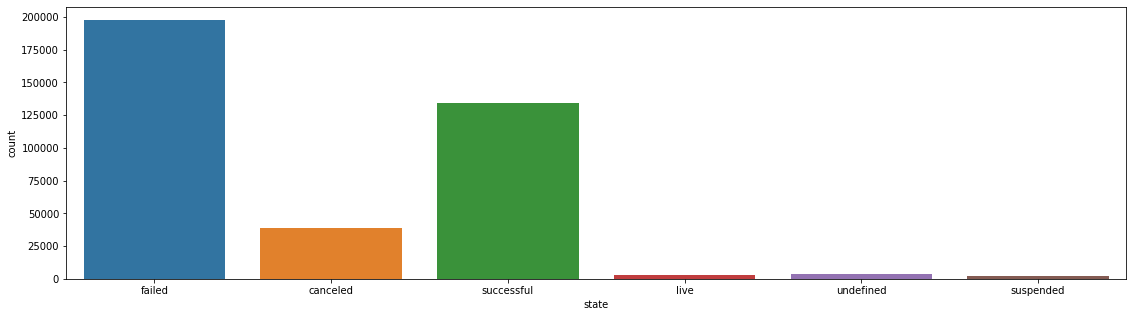

In [20]:
# Distribution and count of different state of the projects.

plt.subplots(figsize=(19,5))
sns.countplot(x="state",data=data)

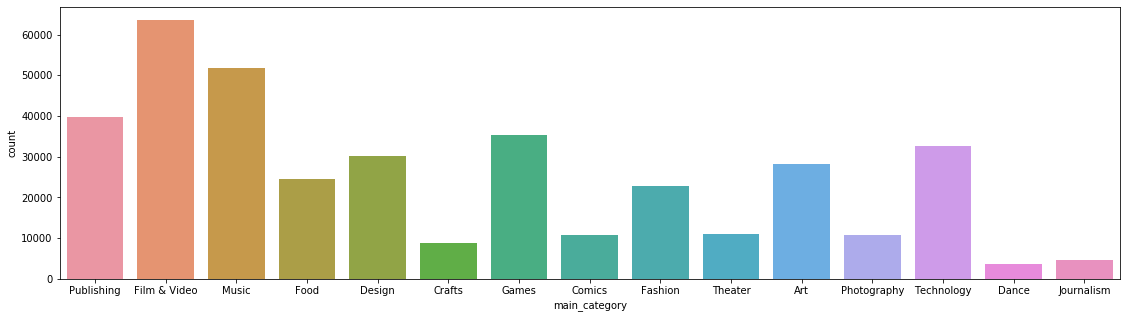

In [21]:
# Count of different categories of projects.

plt.subplots(figsize=(19,5))
sns.countplot(x="main_category",data=data)

In [22]:
launchyear = data.year.value_counts().index

backersort = []
for i in launchyear:
    new = data[data.year == i]
    backersort.append((i,new.backers.sum()))
backersort = pd.DataFrame(backersort, columns = ["Year","Backers"])
backersort

,Year,Backers
0,2015,7512058
1,2014,6194576
2,2016,7148604
3,2017,6653360
4,2013,6292568
5,2012,4343786
6,2011,1396473
7,2010,406875
8,2009,43758
9,2018,1161


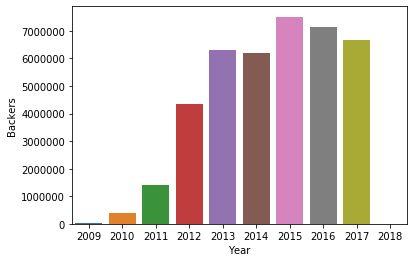

In [23]:
ax = sns.barplot(x="Year", y="Backers", data=backersort)

In [24]:
datasuccess = data[data.state == "successful"]
datafail = data[data.state == "failed"]

Text(0.5, 1.0, 'Successful Campaigns Main Categories')

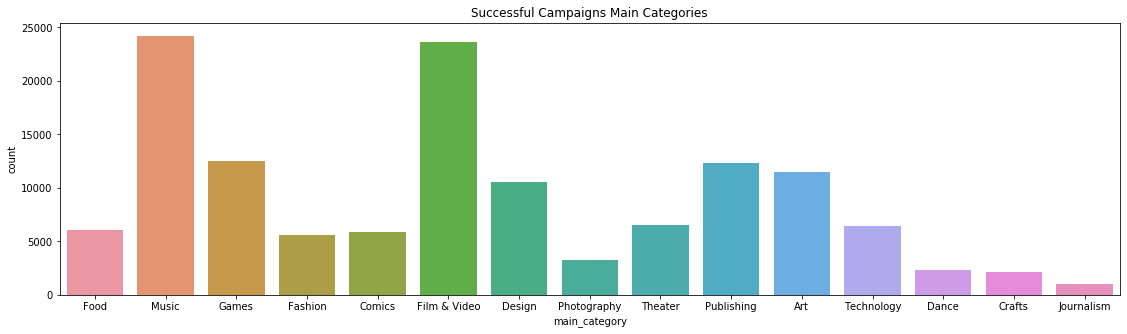

In [25]:
# Distribution of the different categories of 'failed' and 'successful' projects.
plt.subplots(figsize=(19,5))
ax=sns.countplot(x='main_category', data= datasuccess)
ax.set_title("Successful Campaigns Main Categories")

Text(0.5, 1.0, 'Failed Main Campaigns Main Categories')

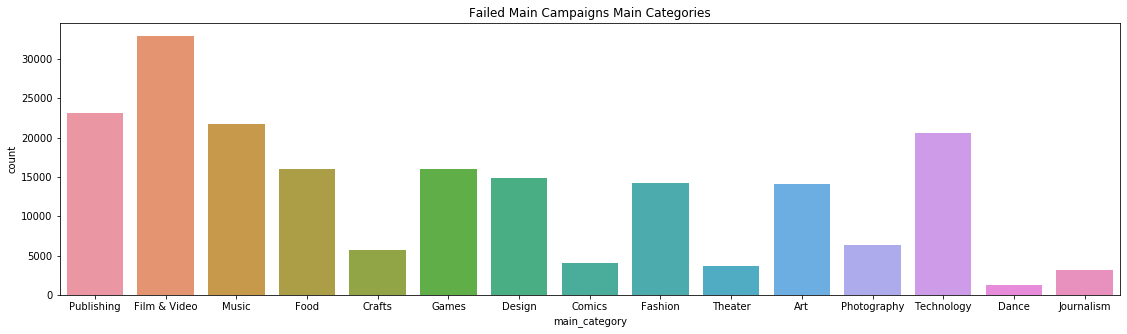

In [26]:
plt.subplots(figsize=(19,5))
ax=sns.countplot(x='main_category', data= datafail)
ax.set_title("Failed Main Campaigns Main Categories")

In [27]:
avg_pledged1=data.groupby('main_category', as_index=False)['usd_pledged_real'].mean()
avg_pledged1

,main_category,usd_pledged_real
0,Art,3221.101382
1,Comics,6610.443828
2,Crafts,1632.907282
3,Dance,3452.946356
4,Design,24417.846732
5,Fashion,5712.450839
6,Film & Video,6158.172126
7,Food,5113.669716
8,Games,21041.903140
9,Journalism,2615.702568


Text(0.5, 1.0, 'Average money raised by each category')

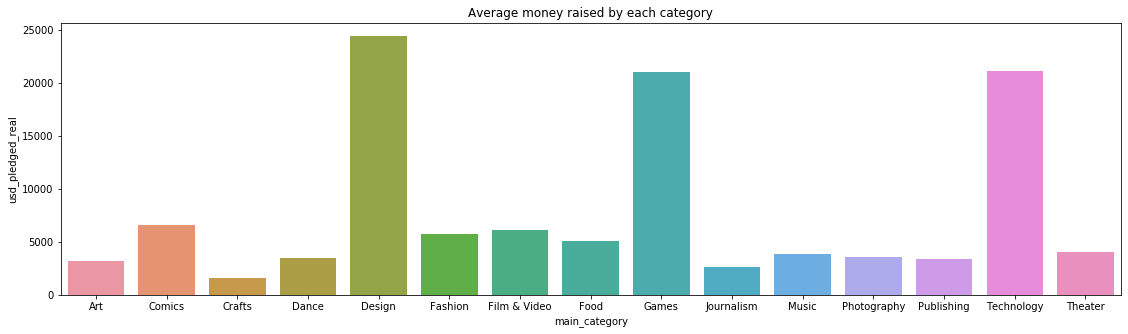

In [28]:
plt.subplots(figsize=(19,5))
ax=sns.barplot(x='main_category', y='usd_pledged_real',data=avg_pledged1)
ax.set_title("Average money raised by each category")

In [29]:
avg_goal1=data.groupby('main_category', as_index=False)['usd_goal_real'].mean()
avg_goal1

,main_category,usd_goal_real
0,Art,39199.435448
1,Comics,19571.430669
2,Crafts,10434.466228
3,Dance,9588.328548
4,Design,41872.764473
5,Fashion,22412.409361
6,Film & Video,82627.801581
7,Food,49039.620804
8,Games,44923.741408
9,Journalism,86003.395014


Text(0.5, 1.0, 'Average goal money set for each category')

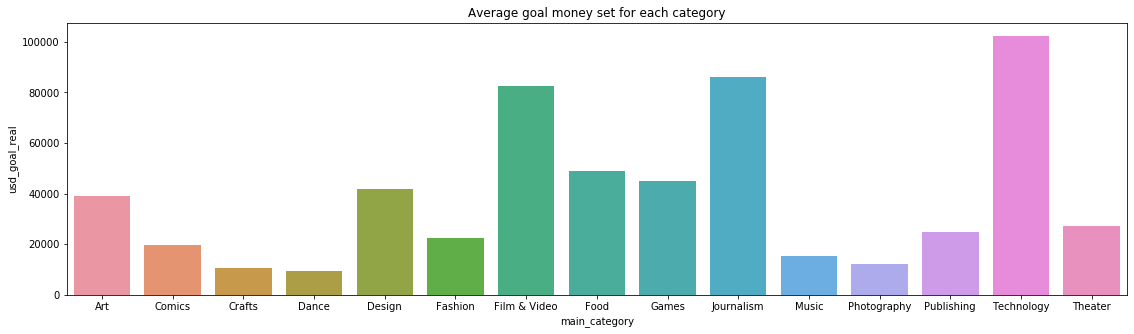

In [30]:
plt.subplots(figsize=(19,5))
ax=sns.barplot(x='main_category', y='usd_goal_real',data=avg_goal1)
ax.set_title("Average goal money set for each category")

In [31]:
# Create a feature for average amount pledged per backer
data['avg_pledged'] = data['usd_pledged_real'] / data['backers']

# Take care of infinite values and campaigns with 0 backers
data['avg_pledged'].fillna(0, inplace=True)
data.replace(to_replace=[np.inf, -np.inf], value=0, inplace=True)

print('Kickstarter backers pledge {} USD to a campaign on average'.format(round(data['avg_pledged'].mean(), 2)))

Kickstarter backers pledge 64.58 USD to a campaign on average


In [32]:
#Separate successful and failed rows from the data
temp = data[(data['state'] == 'failed') | (data['state'] == 'successful')]

#Groupby main_category and find percentage of each state
group = temp.groupby(['main_category','state']).agg({'state': 'size'}).rename(columns={'state' : 'percentage'})
group1 = group.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
group1

,main_category,state,percentage
0,Art,failed,55.110955
1,Art,successful,44.889045
2,Comics,failed,40.858473
3,Comics,successful,59.141527
4,Crafts,failed,72.947045
5,Crafts,successful,27.052955
6,Dance,failed,34.564791
7,Dance,successful,65.435209
8,Design,failed,58.405614
9,Design,successful,41.594386


(0, 100)

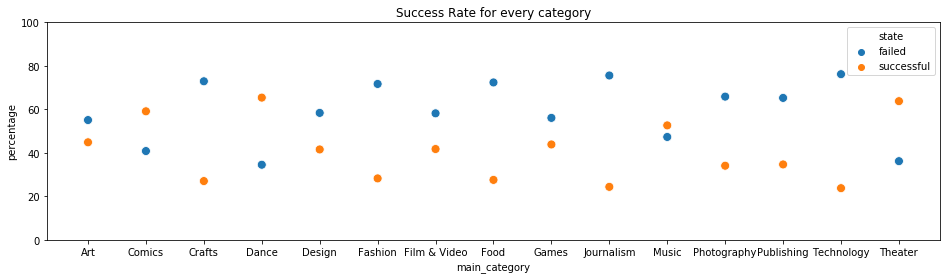

In [33]:
plt.subplots(figsize=(16,4))
ax=sns.scatterplot(x="main_category", y="percentage", hue="state", data=group1, s=80)
ax.set_title("Success Rate for every category")
plt.ylim(0, 100)


### Logistic Regression

In his part, we will try to make a simple model to predict, if a project is going to be successful based on its main category, country and goal.

In [34]:
projects = data[(data['state'] == 'failed') | (data['state'] == 'successful')]

In [35]:
projects.shape

(331675, 18)

In [36]:
projects.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,pledged_ratio,year,month,avg_pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95,0.000000,2015,8,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00,0.080700,2017,9,161.400000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00,0.004889,2013,1,73.333333
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00,0.000200,2012,3,1.000000
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,50000.00,1.047500,2016,2,233.816964


In [37]:
# Selecting features
projects_data = projects[['state', 'main_category', 'country', 'usd_goal_real']]

# Modifing value of dependent variable from categorical to numerical
projects_data.loc[projects_data['state'] == 'failed', 'state'] = 0
projects_data.loc[projects_data['state'] == 'successful', 'state'] = 1

# Scaling goal amount since it behaves differently in each category
for cat in projects_data['main_category'].unique():
    scaler = StandardScaler()
    new_values = scaler.fit_transform(projects_data[projects_data['main_category'] == cat][['usd_goal_real']])
    projects_data.loc[projects['main_category'] == cat, 'usd_goal_real'] = new_values.transpose()[0]

# Modifing independent variables to dummies
projects_data = pd.get_dummies(projects_data)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [38]:
# Spliting data
train_X, test_X, train_y, test_y = train_test_split(projects_data.drop('state', axis=1), projects_data['state'], 
                                                    test_size=0.1, random_state=7)

# Creating model
LR = LogisticRegression()

# Fitting model
LR.fit(train_X, train_y)

# Scoring
print("Model's accuracy is {0}%".format(round(LR.score(test_X, test_y)*100, 2)))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model's accuracy is 63.2%


In [39]:
predictions = LR.predict(test_X)
from sklearn.metrics import classification_report
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.64      0.87      0.74     19767
           1       0.59      0.28      0.38     13401

    accuracy                           0.63     33168
   macro avg       0.62      0.58      0.56     33168
weighted avg       0.62      0.63      0.59     33168



#### What features contribute to successfulness?

In [40]:
from_largest = np.argsort(LR.coef_)[0][::-1]
positive_coef_inds = []
for index in from_largest:
    if LR.coef_[0][index] > 0:
        positive_coef_inds.append(index)
    else:
        break
print(train_X.iloc[:, positive_coef_inds].columns)

Index(['main_category_Theater', 'main_category_Comics', 'country_HK',
       'main_category_Dance', 'main_category_Music', 'country_SG',
       'country_US', 'country_FR', 'country_GB', 'country_DK', 'country_N,0"',
       'main_category_Art', 'main_category_Games', 'country_NZ',
       'main_category_Design', 'country_LU', 'country_SE'],
      dtype='object')


As we see, being in category 'Theater', 'Comics', 'Dance' and 'Music' or being from Hong Kong had a positive influence of being a successful project.

#### What feature has the largest impact on failing?

In [41]:
print(train_X.iloc[:, np.argmin(LR.coef_[0])].name)

usd_goal_real


#### Insights:
1. The higher the goal, the more likely the project is going to fail.
2. 'Theater', 'Comics', 'Dance' and 'Music' or being from Hong Kong had a positive influence of being a successful project.
3. 2015 saw the highest number of registered projects/ campaigns
4. Even though a large number of projects fail, projects that raise more money tend to succeed and do well
5. 'Design', 'Technology' and 'Games' raise the most money, however 'Technology', 'Journalism' and 'Film&Video' have the highest goal amount set
6. Kickstarter backers pledge 64.58 USD to a campaign on average